
Image Classification with TensorFlow by importing some necessary packages:


In [23]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


Import the Fashion MNIST dataset.
The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the images of clothing

In [7]:

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In the dataset, each image is mapped into a single label. Since the class names are not defined in the dataset, we need to store them here so that we can use them later when viewing the images:


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

the data must be preprocessed before training the neural network. If you inspect the first frame of the training set, you will find that the pixel values ​​are between 0 and 255:

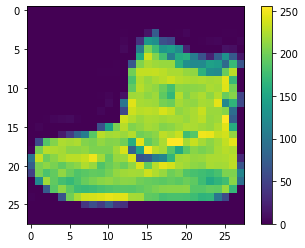

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


To do normalization, we need to divide the values ​​by 255. The training set and the test set should be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0


display the first 25 images of the training set and display the name of the class under each image:


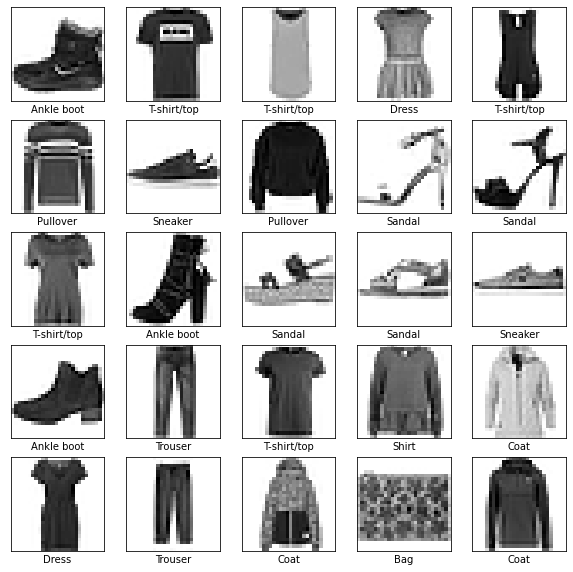

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

create the layers of neural network:


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Compiling The Model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Training Model

In [14]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4973 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3769 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3372 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2937 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2466 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [16]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.5653082e-08, 2.6368754e-10, 1.2747821e-09, 3.4730112e-09,
       5.6462690e-10, 7.8019314e-04, 3.2487215e-08, 9.4542392e-03,
       1.6524121e-08, 9.8976547e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the “confidence” of the model that the image matches each of the 10 different garments. Let’s see which label has the highest confidence value:

In [17]:
np.argmax(predictions[0])

9

Examination of the test label shows that this classification is correct

In [18]:
test_labels[0]


9

helper function to plot  predictions

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

look at the 0th frame of the predictions and the prediction table. The correct prediction labels are blue and the incorrect prediction labels are red:

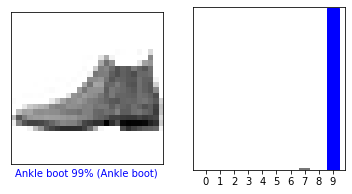

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

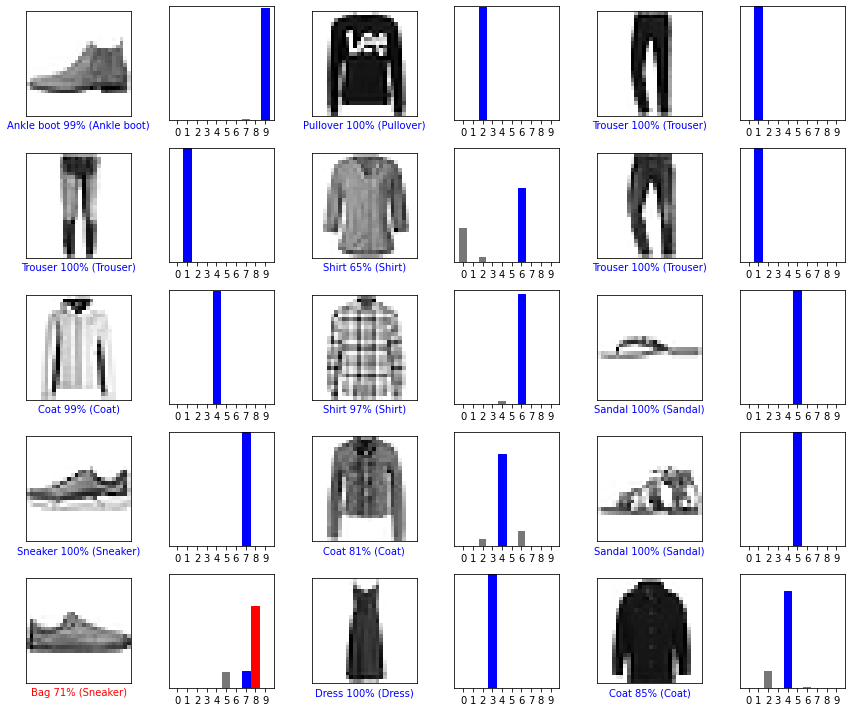

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

only the boots are recognized wrong as sandals